## Analysis of iPhone 128 GB Prices Using Linear Regression Modeling

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [24]:
df = pd.read_csv('telephones2.csv')

In [25]:
df.head()

,model,year,price
0,iPhone 13,2021,34.699
1,iPhone 11,2019,18.916
2,iPhone 12 Pro Max,2020,38.999
3,iPhone 13 Pro Max,2021,51.071
4,iPhone 14 Pro,2022,57.695


In [26]:
# Add a new column 'model_year' which is the number of years since the first year in the dataset
df['model_year'] = df['year'].max() - df['year']
df.head()

,model,year,price,model_year
0,iPhone 13,2021,34.699,2
1,iPhone 11,2019,18.916,4
2,iPhone 12 Pro Max,2020,38.999,3
3,iPhone 13 Pro Max,2021,51.071,2
4,iPhone 14 Pro,2022,57.695,1


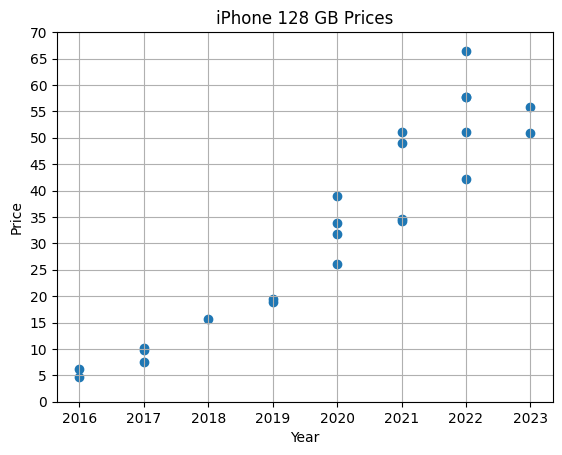

In [27]:
plt.scatter(df['year'], df['price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('iPhone 128 GB Prices') 
plt.yticks(range(0, 75, 5))
plt.grid()
plt.show()

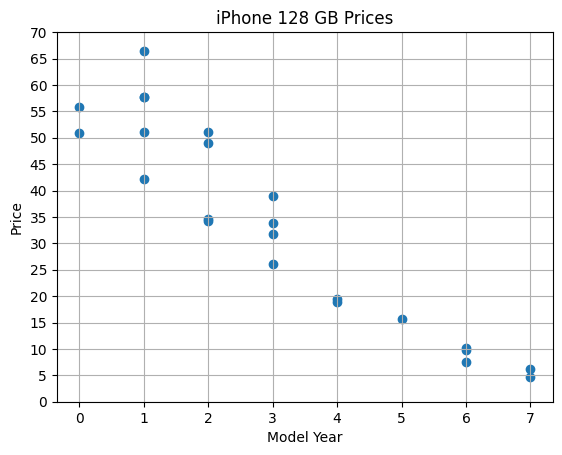

In [28]:
plt.scatter(df['model_year'], df['price'])
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.title('iPhone 128 GB Prices') 
plt.yticks(range(0, 75, 5))
plt.grid()
plt.show()

In [29]:
df = df.drop(columns=['model','year'])
df.head()

,price,model_year
0,34.699,2
1,18.916,4
2,38.999,3
3,51.071,2
4,57.695,1


Model - Linear Regression

In [30]:
model = LinearRegression()

In [31]:
model.fit(df[['model_year']], df['price'])

LinearRegression()

In [32]:
predicted = model.predict(df[['model_year']])
predicted

array([42.21458537, 25.80896341, 34.01177439, 42.21458537, 50.41739634,
        1.20053049,  1.20053049,  9.40334146,  9.40334146, 17.60615244,
       34.01177439, 34.01177439, 50.41739634, 42.21458537, 58.62020732,
       58.62020732, 50.41739634, 50.41739634, 50.41739634, 42.21458537,
       34.01177439, 25.80896341,  9.40334146])

Visualize the Result

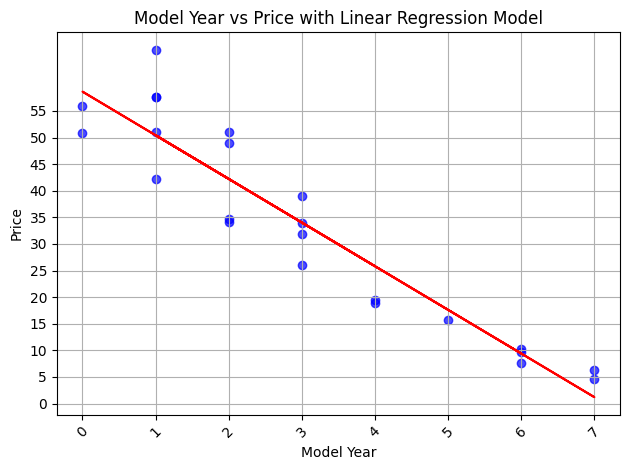

In [33]:
plt.scatter(df['model_year'], df['price'], color='blue', label='Actual Data', alpha=0.7)
plt.plot(df['model_year'], predicted, color='red', label='Predicted Data')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.yticks(range(0, 60, 5))
plt.title('Model Year vs Price with Linear Regression Model')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [34]:
# the parameters of the model
model.coef_, model.intercept_

(array([-8.20281098]), np.float64(58.62020731707317))

Error

In [11]:
mse = mean_squared_error(df['price'], predicted)
mae = mean_absolute_error(df['price'], predicted)
r2_ = r2_score(df['price'], predicted)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2_}")


Mean Squared Error: 42.21762756919219
Mean Absolute Error: 5.346932661717614
R-squared: 0.8811163231707224
